In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import math
import datetime as dt

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows', 20)

from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import accuracy_score, f1_score, mean_squared_log_error


In [2]:
# def impute_missing(df):
#     """
#         Function to handle missing values in a dataset.
#         could use simple imputation if percentage of missing data is
#         less or equal to 5%
#         else uses knn to impute the missing values.
#     """

#     # total number of observations in dataset
#     df_len = df.shape[0]

#     #column names
#     columns = df.columns

#     cat_cols = []
#     num_cols = []

#     for col in columns:
#         if (df[col].dtype == "object"):
#             cat_cols.append(col)
#         else:
#             num_cols.append(col)

#     missing_num_cols, missing_cat_cols = [], []

#     for col in cat_cols:
#         if (df[col].isnull().sum() > 0):
#             missing_cat_cols.append(col)
    
#     for col in num_cols:
#             if (df[col].isnull().sum() > 0):
#                 missing_num_cols.append(col)

#     for col in missing_num_cols:

#         missing_per = df[col].isnull().sum() / df_len

#         if (missing_per > 0.05):

#             imputer = KNNImputer(n_neighbors=2)
#             df[col] = imputer.fit_transform(df[[col]])

#         else:
#             col_median = df[col].median()
#             df[col] = df[col].fillna(col_median)

#     for col in missing_cat_cols:
#         imputer = KNNImputer(n_neighbors=2)
#         df[col] = imputer.fit_transform(df[[col]])

In [4]:
train = pd.read_csv("data/train.csv", sep=",")
test = pd.read_csv("data/test.csv", sep=",")
macro = pd.read_csv("data/macro.csv", sep=",")

In [4]:
train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [5]:
test.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,...,8,0,0,0,1,10,1,0,14,1
1,30475,2015-07-01,79.2,NaN,8,17,1,0.0,3,1.0,...,4,1,1,0,2,11,0,1,12,1
2,30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,...,42,11,4,0,10,21,0,10,71,11
3,30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,...,1,1,2,0,0,10,0,0,2,0
4,30478,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,...,5,1,1,0,2,12,0,1,11,1


In [6]:
macro.head()

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,2010-01-02,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2,2010-01-03,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
3,2010-01-04,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.905,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
4,2010-01-05,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.836,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN


In [7]:
train['price_doc'].dtype

dtype('int64')

Text(0, 0.5, 'price_doc')

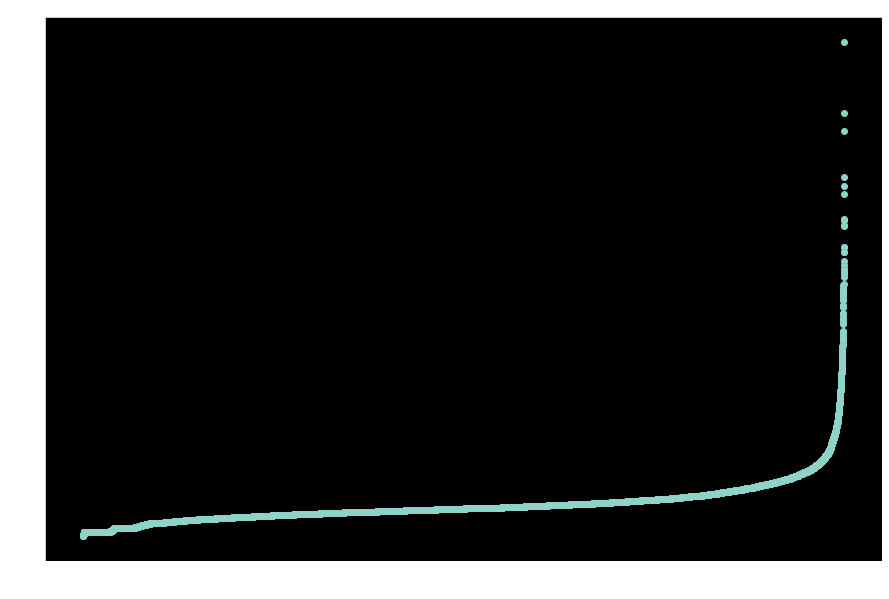

In [8]:
plt.figure(figsize=(15, 10))

plt.scatter(range(train.shape[0]), np.sort(train.price_doc.values))
plt.xlabel("Index")
plt.ylabel("price_doc")

C:\Users\David-Daniel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'price')

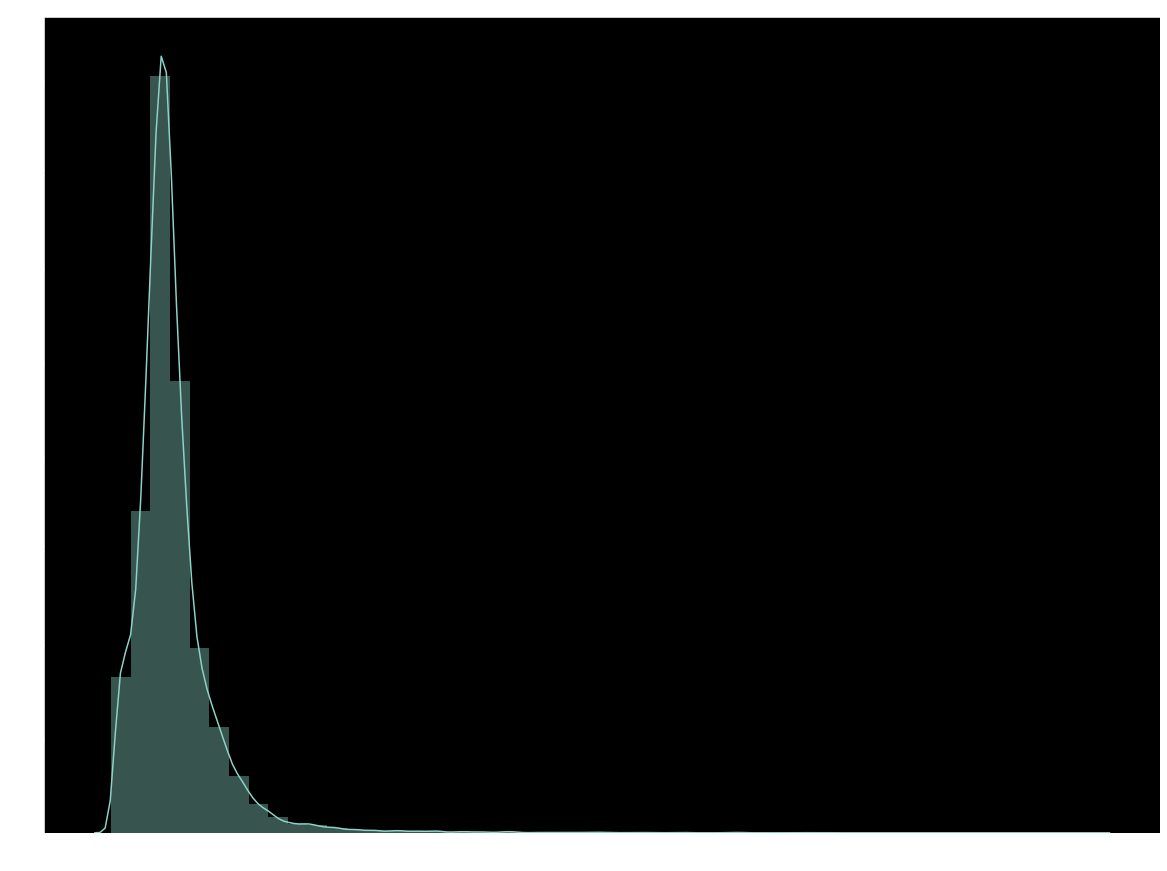

In [9]:
plt.figure(figsize=(20, 15))
sns.distplot(train['price_doc'].values, bins=50, kde=True)
plt.xlabel('price')

C:\Users\David-Daniel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'price')

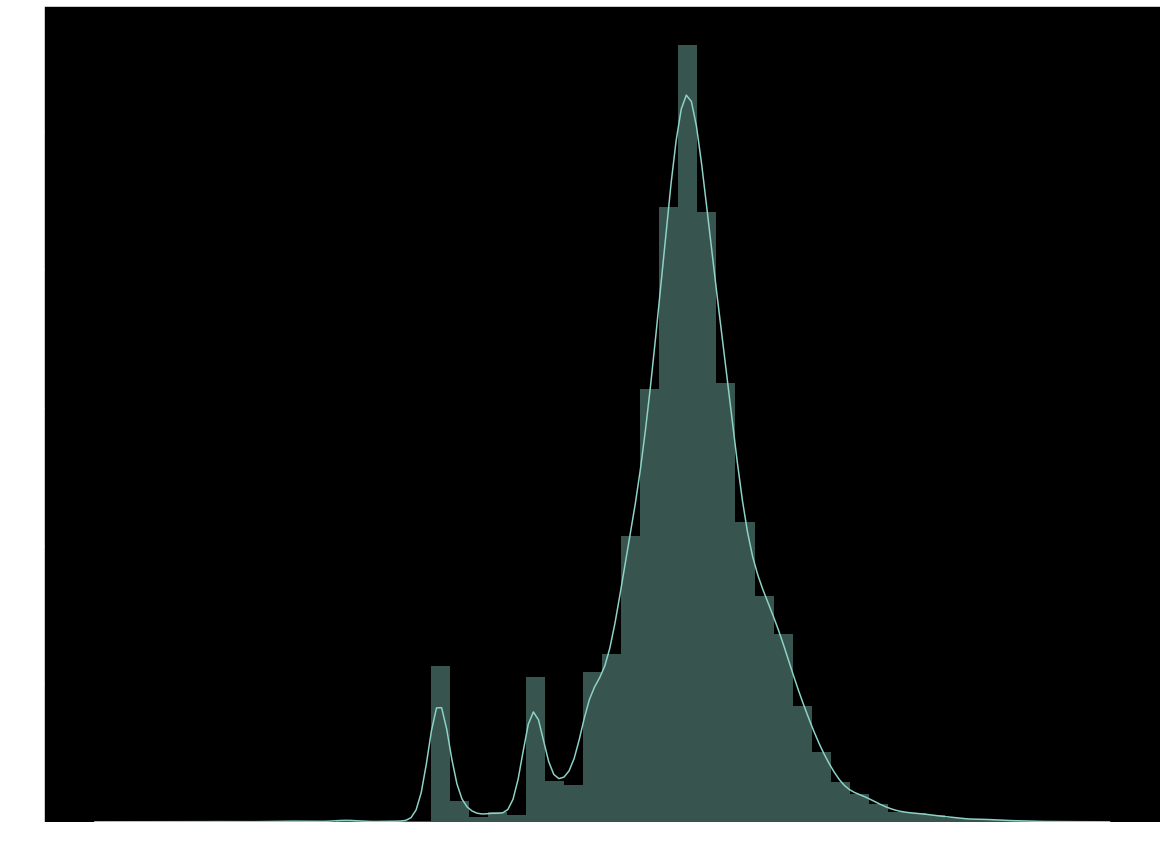

In [10]:
plt.figure(figsize=(20, 15))
sns.distplot(np.log(train['price_doc'].values), bins=50, kde=True)
plt.xlabel('price')

In [11]:
missing = train.isnull().sum(axis=0).reset_index()
missing.columns = ['name', 'missing_count']

missing = missing.loc[missing['missing_count'] > 0, :]
missing.sort_values(by='missing_count', inplace=True)

idx = range(missing.shape[0])
idx

range(0, 51)

In [12]:
train.columns

Index(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price_doc'],
      dtype='object', length=292)

In [13]:
corr = train.corr()
corr['price_doc'].sort_values(ascending=False).reset_index()


,index,price_doc
0,price_doc,1.000000
1,num_room,0.476337
2,full_sq,0.341840
3,sport_count_5000,0.294864
4,sport_count_3000,0.290651
...,...,...
271,ttk_km,-0.272620
272,bulvar_ring_km,-0.279158
273,kremlin_km,-0.279249
274,sadovoe_km,-0.283622


In [14]:
corr

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
id,1.000000,0.021447,0.014478,-0.022523,0.007037,0.008507,-0.012726,0.014387,-0.010414,-0.119621,...,0.018635,0.022958,0.023704,0.012813,0.015181,-0.048797,0.020671,-0.011680,-0.025627,0.121203
full_sq,0.021447,1.000000,0.161112,0.089649,0.119225,0.032866,-0.006041,0.695444,0.020026,-0.091348,...,0.039083,0.040059,0.043560,0.026895,0.028579,0.021568,0.030218,0.001580,-0.041254,0.341840
life_sq,0.014478,0.161112,1.000000,0.045090,0.042442,0.011393,-0.002401,0.191024,0.000633,-0.066633,...,0.028735,0.031551,0.034888,0.017845,0.018114,0.009945,0.022737,-0.014499,-0.050337,0.165606
floor,-0.022523,0.089649,0.045090,1.000000,0.454488,-0.009043,0.001192,-0.005657,-0.008457,-0.113906,...,-0.034791,-0.029636,-0.022303,-0.044398,-0.045614,-0.012256,-0.044236,-0.102101,-0.123843,0.117447
max_floor,0.007037,0.119225,0.042442,0.454488,1.000000,0.045915,-0.000261,-0.014220,0.020345,-0.072161,...,-0.040235,-0.033662,-0.029525,-0.048235,-0.048240,-0.058255,-0.048664,-0.099855,-0.113341,0.094386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mosque_count_5000,-0.048797,0.021568,0.009945,-0.012256,-0.058255,0.050355,0.019631,0.062785,0.013183,0.091894,...,0.529434,0.492859,0.481481,0.502028,0.550342,1.000000,0.499376,0.518500,0.242078,0.175107
leisure_count_5000,0.020671,0.030218,0.022737,-0.044236,-0.048664,0.044502,-0.000830,0.058663,-0.006259,-0.003876,...,0.986206,0.975462,0.948391,0.969029,0.975259,0.499376,1.000000,0.809169,0.463053,0.200448
sport_count_5000,-0.011680,0.001580,-0.014499,-0.102101,-0.099855,0.098482,0.005978,0.089908,0.016866,0.194379,...,0.824139,0.778770,0.753384,0.825883,0.847771,0.518500,0.809169,1.000000,0.733897,0.294864
market_count_5000,-0.025627,-0.041254,-0.050337,-0.123843,-0.113341,0.076378,0.007362,0.061674,0.026404,0.273385,...,0.432265,0.380154,0.353270,0.482547,0.514344,0.242078,0.463053,0.733897,1.000000,0.194021


Text(0.5, 0, 'Number of missing values')

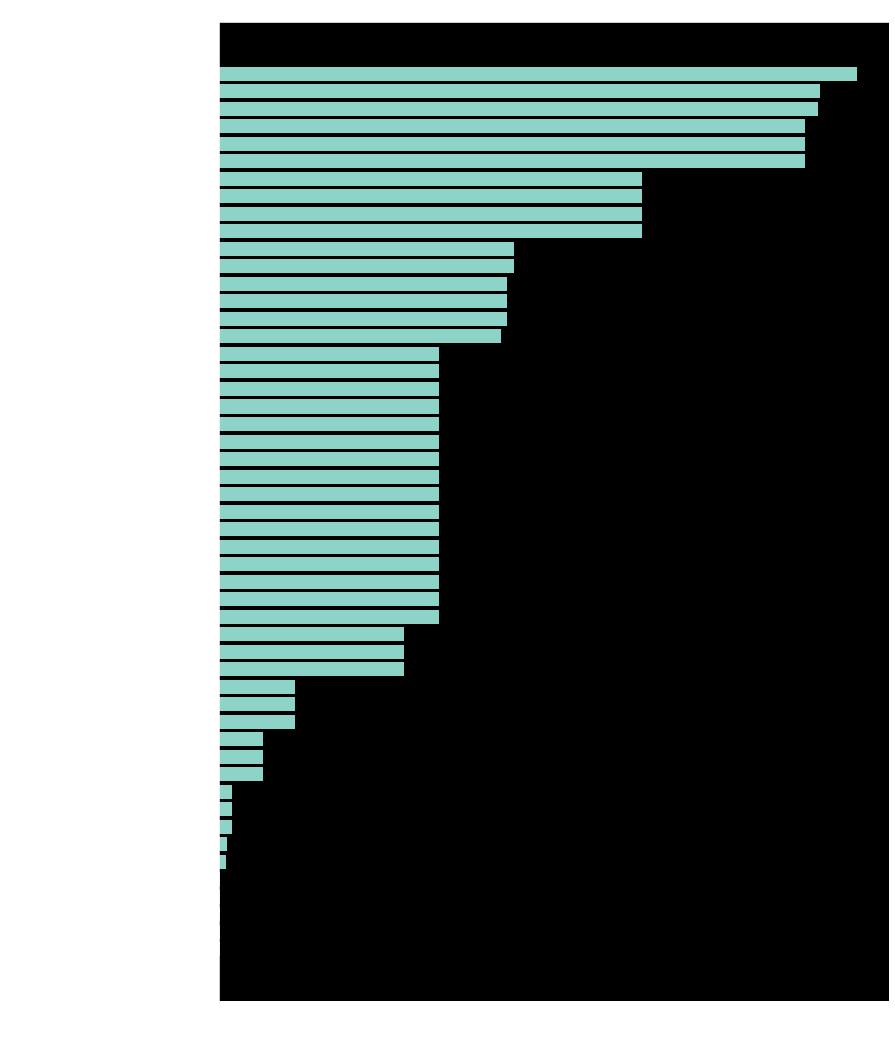

In [15]:
fig, ax = plt.subplots(figsize=(12, 18))

ax.barh(idx, missing['missing_count'])
ax.set_yticks(idx)
ax.set_yticklabels(missing['name'].values)

ax.set_title("Percentage of missing values in columns")
ax.set_ylabel("Columns")
ax.set_xlabel("Number of missing values")

<AxesSubplot:xlabel='floor', ylabel='count'>

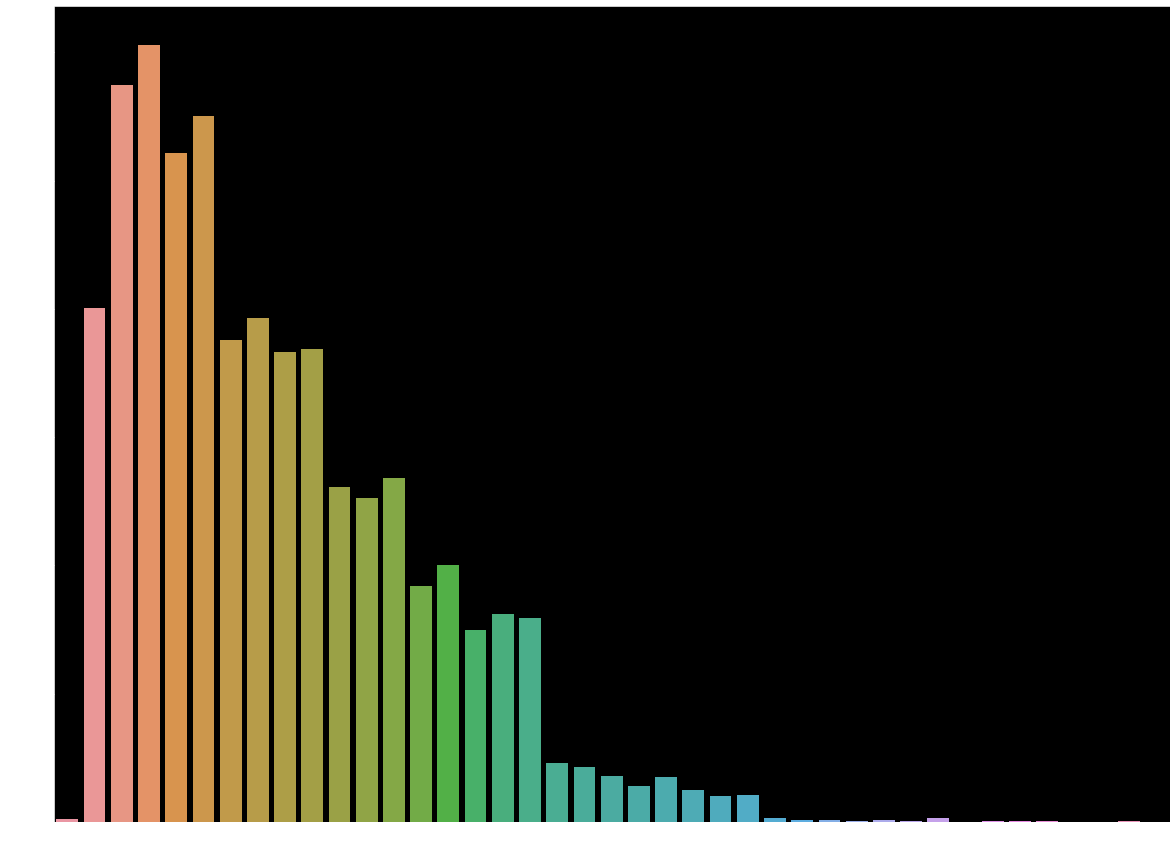

In [16]:
plt.figure(figsize=(20, 15))
sns.countplot(x='floor', data=train)

# ax.set_title("")

In [17]:
train['timestamp'] = train['timestamp'].astype(np.datetime64)
train['yearmonth'] = train['timestamp'].map(lambda x: 100*x.year + x.month)

In [18]:
test['timestamp'] = test['timestamp'].astype(np.datetime64)
test['yearmonth'] = test['timestamp'].map(lambda x: 100*x.year + x.month)

In [19]:
train_yearmonth = train.groupby('yearmonth')['price_doc'].aggregate(np.median).sort_values(ascending=False).reset_index()
train_yearmonth

,yearmonth,price_doc
0,201503,7300000.0
1,201501,7300000.0
2,201502,7259103.0
3,201506,7100000.0
4,201505,7000000.0
...,...,...
42,201301,5409889.0
43,201109,5200000.0
44,201210,5150823.0
45,201211,5140640.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 [Text(0, 0, '201108'),
  Text(1, 0, '201109'),
  Text(2, 0, '201110'),
  Text(3, 0, '201111'),
  Text(4, 0, '201112'),
  Text(5, 0, '201201'),
  Text(6, 0, '201202'),
  Text(7, 0, '201203'),
  Text(8, 0, '201204'),
  Text(9, 0, '201205'),
  Text(10, 0, '201206'),
  Text(11, 0, '201207'),
  Text(12, 0, '201208'),
  Text(13, 0, '201209'),
  Text(14, 0, '201210'),
  Text(15, 0, '201211'),
  Text(16, 0, '201212'),
  Text(17, 0, '201301'),
  Text(18, 0, '201302'),
  Text(19, 0, '201303'),
  Text(20, 0, '201304'),
  Text(21, 0, '201305'),
  Text(22, 0, '201306'),
  Text(23, 0, '201307'),
  Text(24, 0, '201308'),
  Text(25, 0, '201309'),
  Text(26, 0, '201310'),
  Text(27, 0, '201311'),
  Text(28, 0, '201312'),
  Text(29, 0, '201401'),
  Text(30, 0, '201402'),
  Text(31, 0, '201403

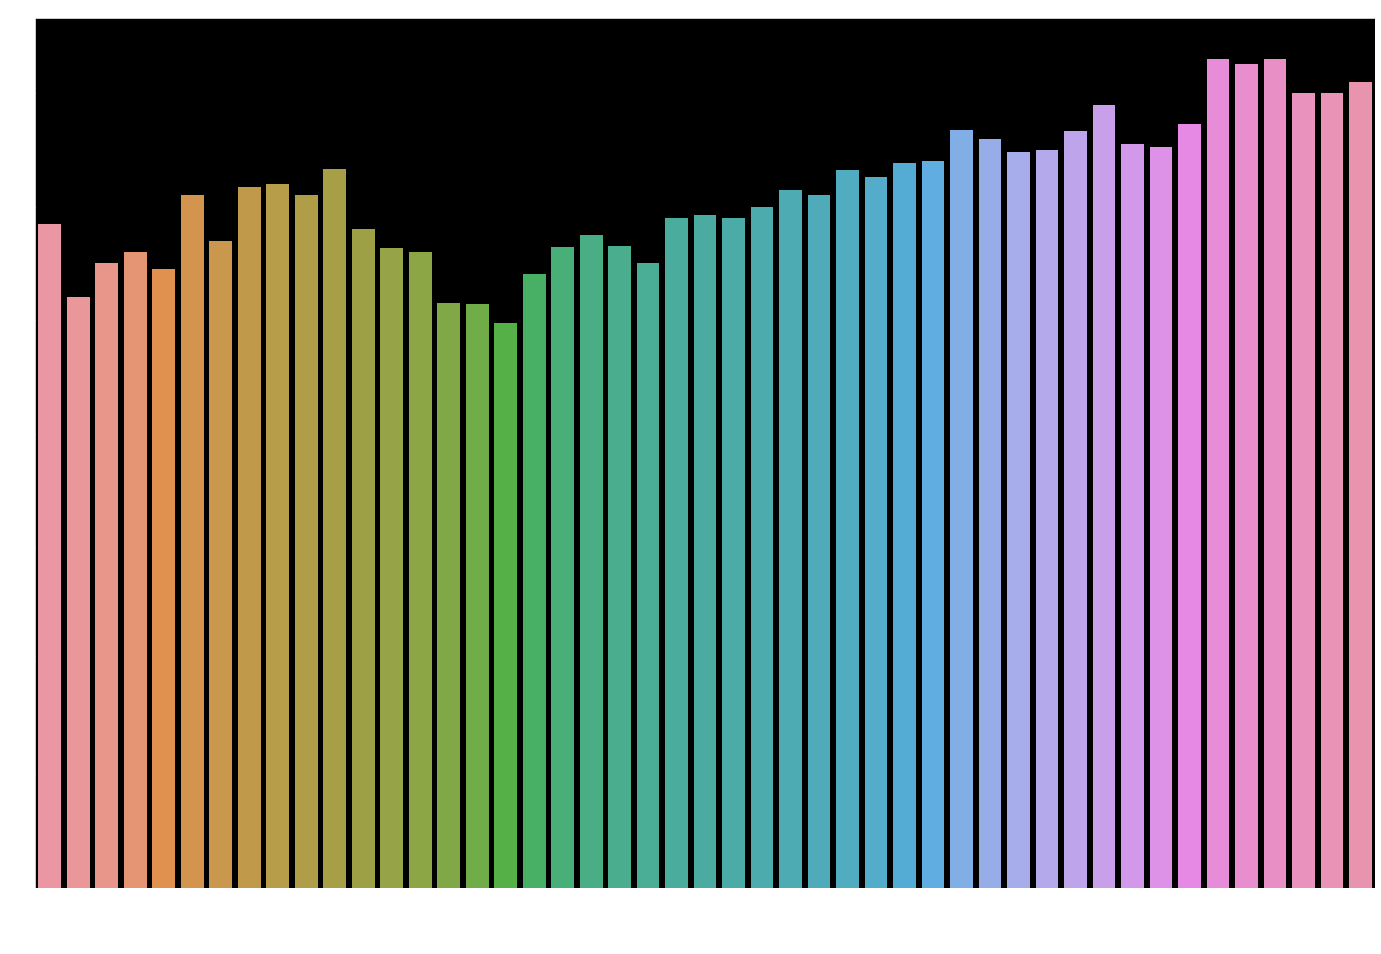

In [20]:
plt.figure(figsize=(24, 16))
sns.barplot(
    x = train_yearmonth['yearmonth'],
    y = train_yearmonth['price_doc'],
    data = train_yearmonth
)

plt.xticks(rotation='vertical')

**Splitting the Dataset into sections for easier EDA**

In [21]:
general_info = [
    'id', 'timestamp',
    'full_sq', 'life_sq',
    'floor', 'max_floor',
    'material', 'build_year',
    'num_room', 'kitch_sq',
    'state', 'product_type', 'sub_area', 'price_doc']


In [22]:
general_df = train[general_info]

# dropping id column
general_df.drop('id', axis=1, inplace=True )

general_df.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,price_doc
0,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,5850000
1,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,6000000
2,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,5700000
3,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,13100000
4,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,16331452


In [23]:
general_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     30471 non-null  datetime64[ns]
 1   full_sq       30471 non-null  int64         
 2   life_sq       24088 non-null  float64       
 3   floor         30304 non-null  float64       
 4   max_floor     20899 non-null  float64       
 5   material      20899 non-null  float64       
 6   build_year    16866 non-null  float64       
 7   num_room      20899 non-null  float64       
 8   kitch_sq      20899 non-null  float64       
 9   state         16912 non-null  float64       
 10  product_type  30471 non-null  object        
 11  sub_area      30471 non-null  object        
 12  price_doc     30471 non-null  int64         
dtypes: datetime64[ns](1), float64(8), int64(2), object(2)
memory usage: 3.0+ MB


In [24]:
general_df.isnull().sum()

timestamp           0
full_sq             0
life_sq          6383
floor             167
max_floor        9572
material         9572
build_year      13605
num_room         9572
kitch_sq         9572
state           13559
product_type        0
sub_area            0
price_doc           0
dtype: int64

**Correlation between general info and price**

<AxesSubplot:>

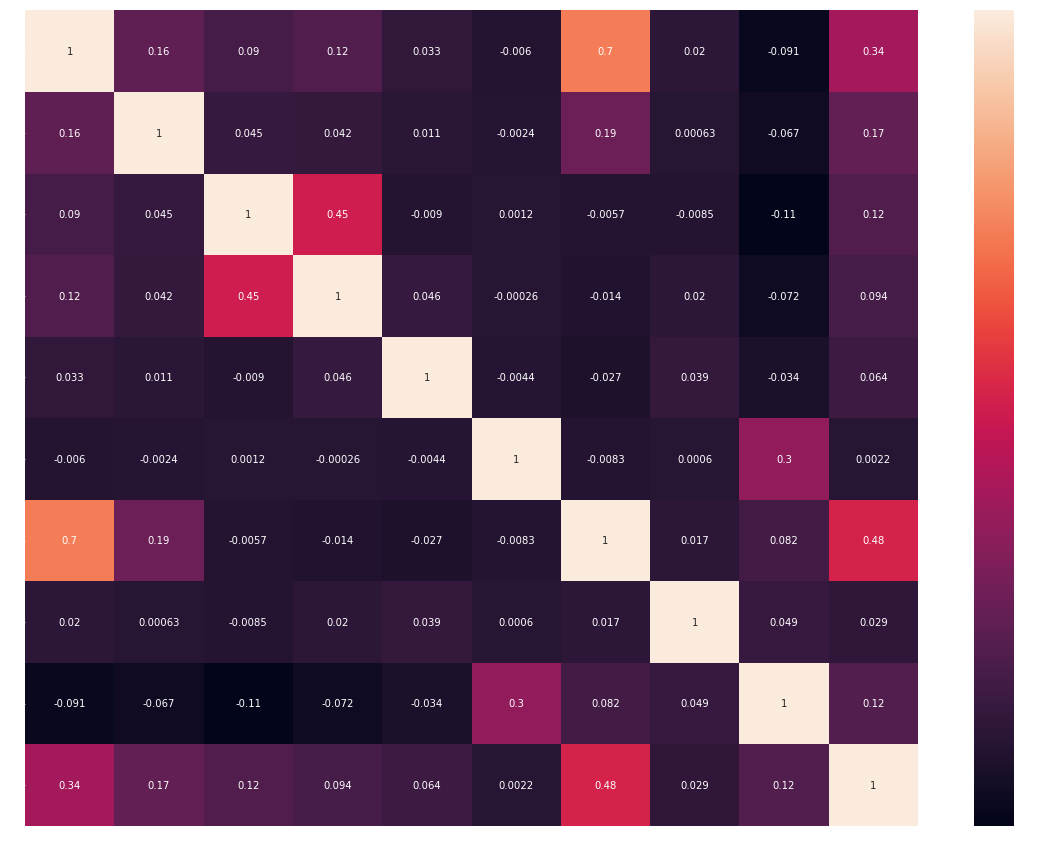

In [25]:
corr = general_df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True)

Strongest correlation is seen with num_rooms, life_sq, full_sq, state.
<br>
high collinerity between num_room and full_sq

<AxesSubplot:xlabel='num_room', ylabel='price_doc'>

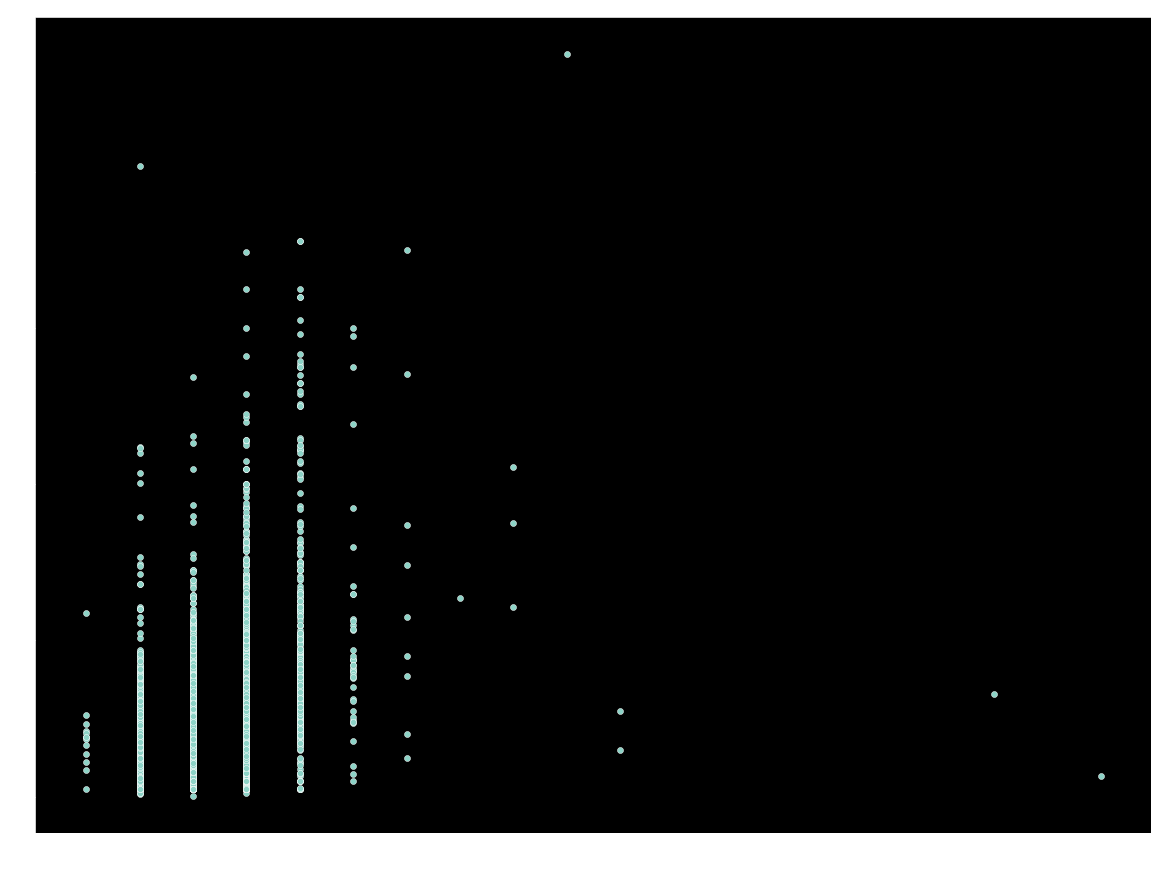

In [26]:
plt.figure(figsize=(20, 15))
sns.scatterplot(
    x = train['num_room'],
    y = train['price_doc']
)

<AxesSubplot:xlabel='life_sq', ylabel='price_doc'>

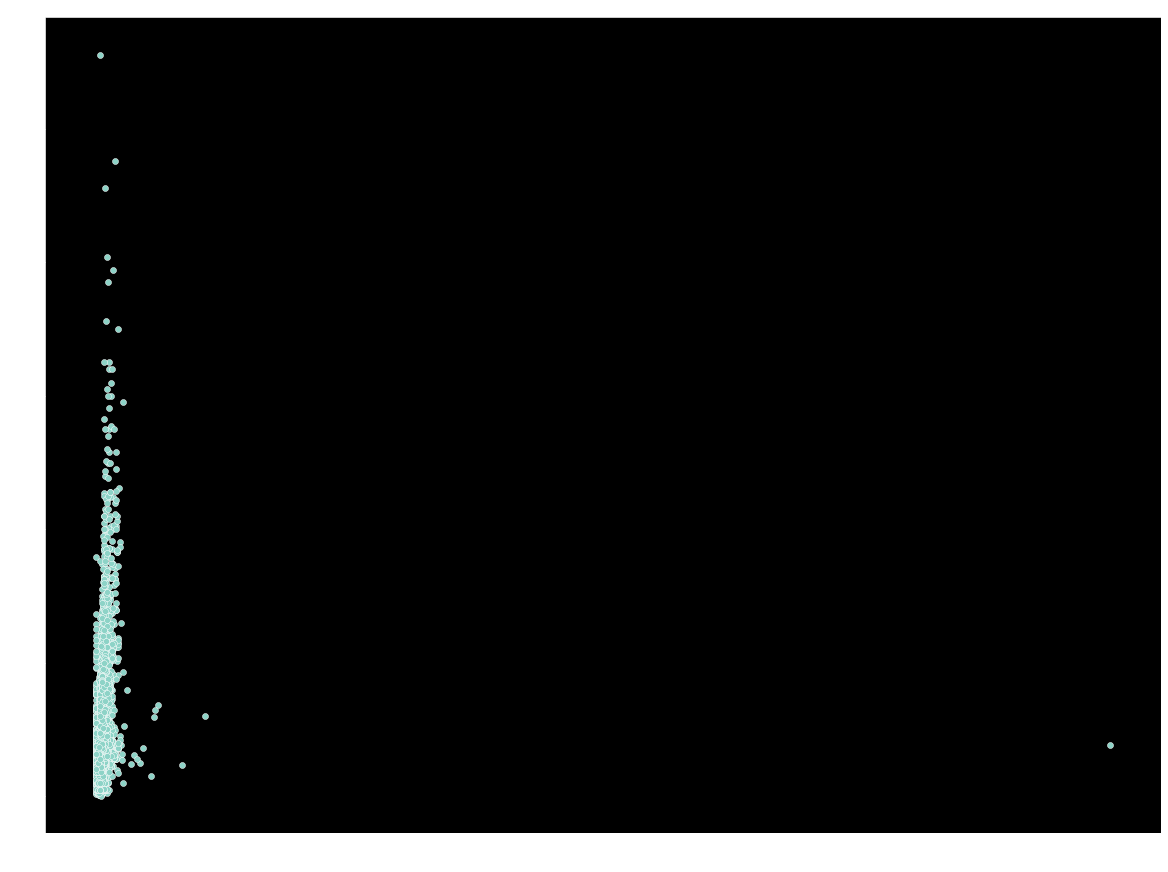

In [27]:
plt.figure(figsize=(20, 15))
sns.scatterplot(
    x = train['life_sq'],
    y = train['price_doc']
)

<AxesSubplot:xlabel='full_sq', ylabel='price_doc'>

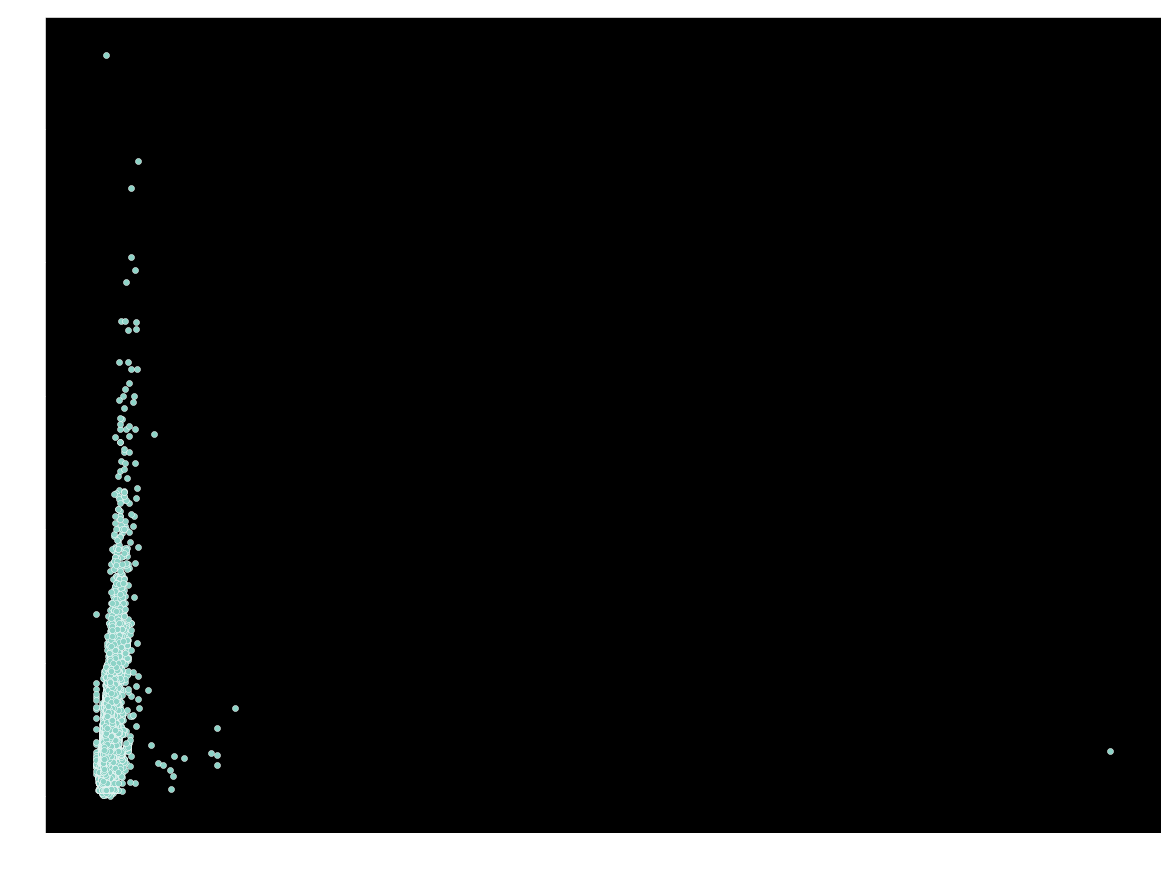

In [28]:
plt.figure(figsize=(20, 15))
sns.scatterplot(
    x = train['full_sq'],
    y = train['price_doc']
)

In [29]:
train['state'].unique()

array([nan,  3.,  1.,  2.,  4., 33.])

<AxesSubplot:xlabel='state', ylabel='price_doc'>

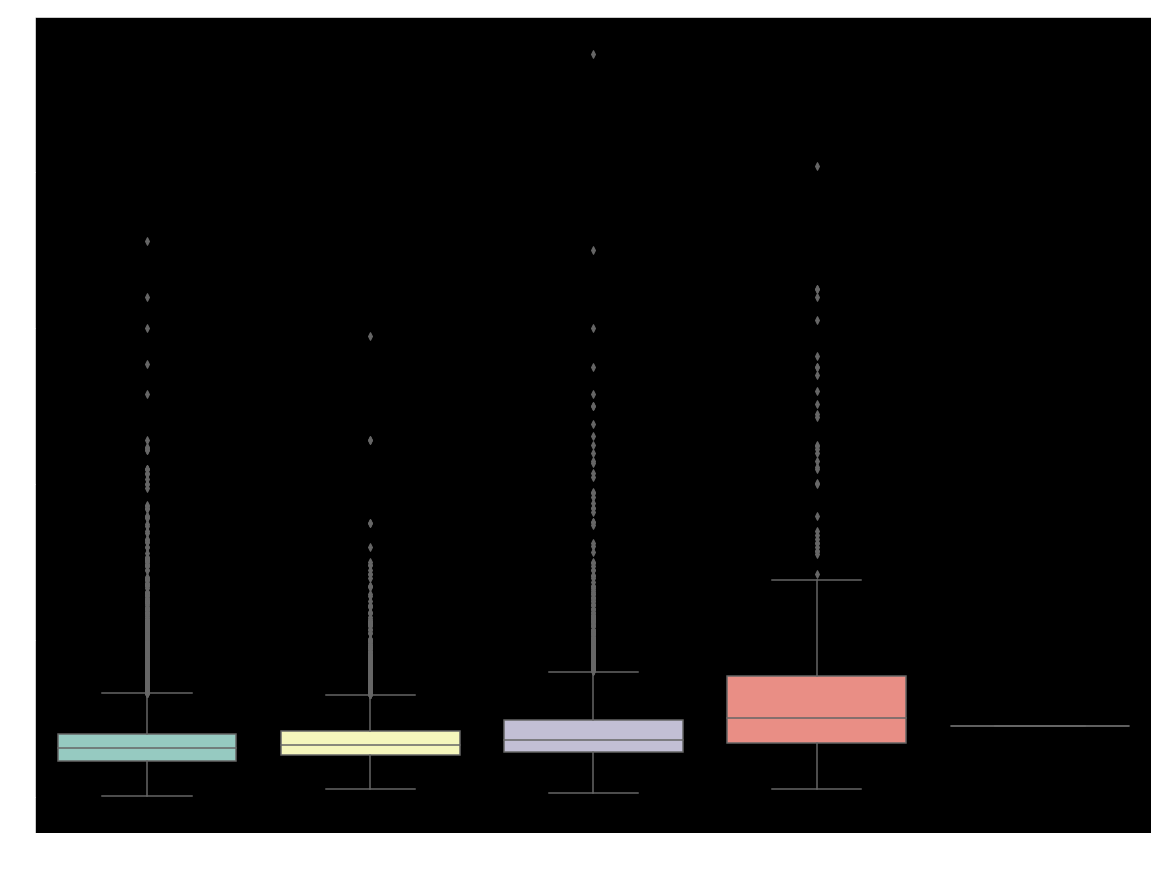

In [30]:
# using boxplot for state since it is a categorical column
plt.figure(figsize=(20, 15))
sns.boxplot(
    x = train['state'],
    y = train['price_doc']
)

Text(0, 0.5, 'Price')

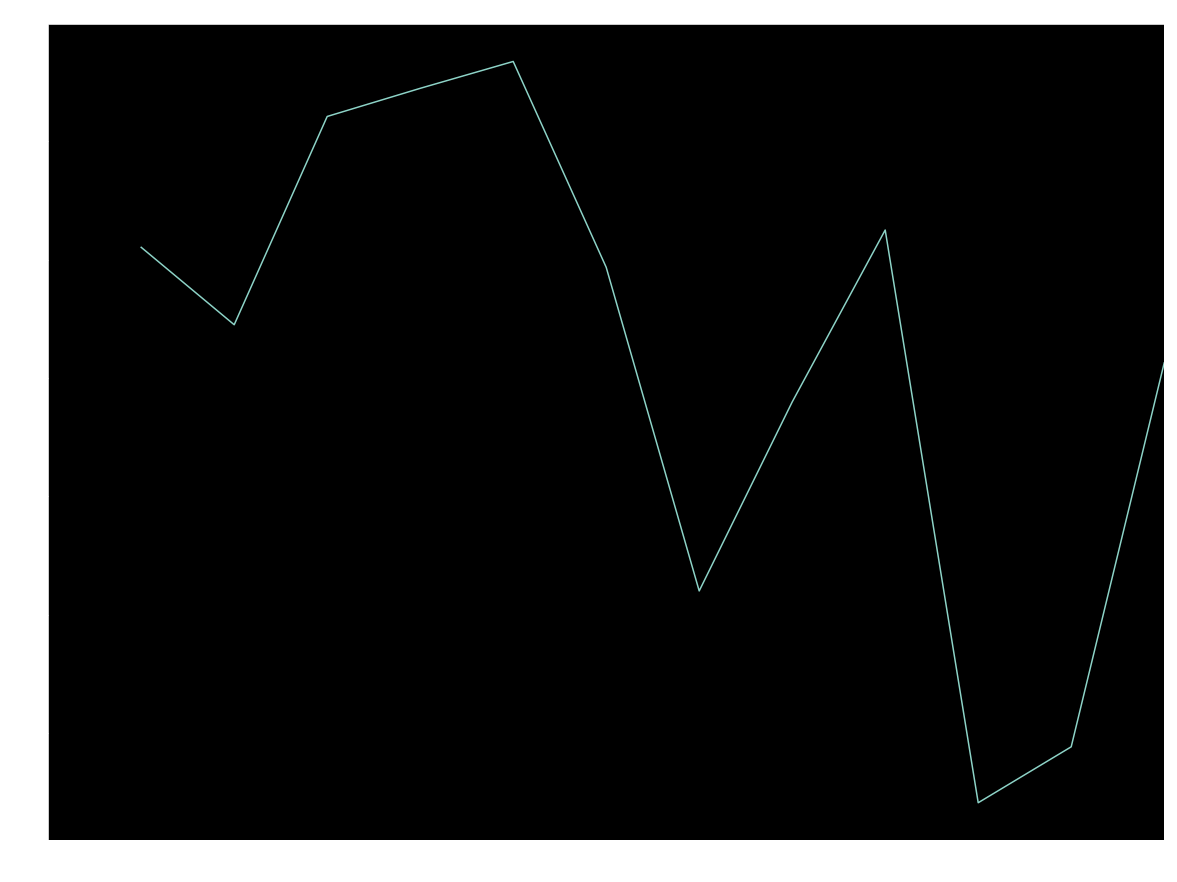

In [31]:
#Feature engineering
general_df['month'] = general_df['timestamp'].dt.month

# 12-09-2022
# 12092022
# 12/03/2022

plt.figure(figsize=(20, 15))

plt.plot(general_df.groupby('month')['price_doc'].mean())
plt.xlim(0, 12)
plt.xticks([i for i in range(1, 13)])

plt.title("Change in Average price per month", fontsize=16)
plt.xlabel("Months", fontsize=14)
plt.ylabel("Price", fontsize=14)


<AxesSubplot:xlabel='month', ylabel='price_doc'>

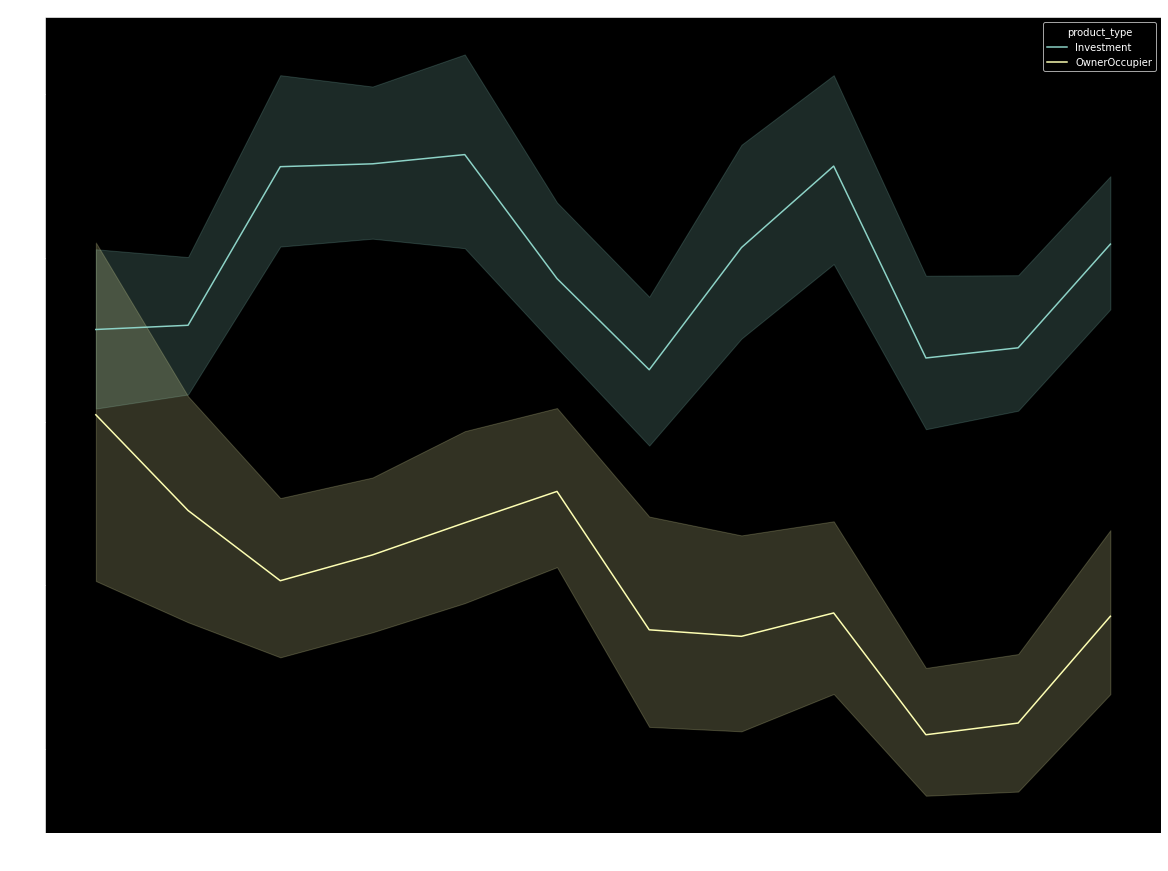

In [32]:
fig, ax = plt.subplots(figsize=(20, 15))

sns.lineplot(
    x="month",
    y='price_doc',
    data=general_df,
    hue='product_type'
)


Text(0, 0.5, 'Price')

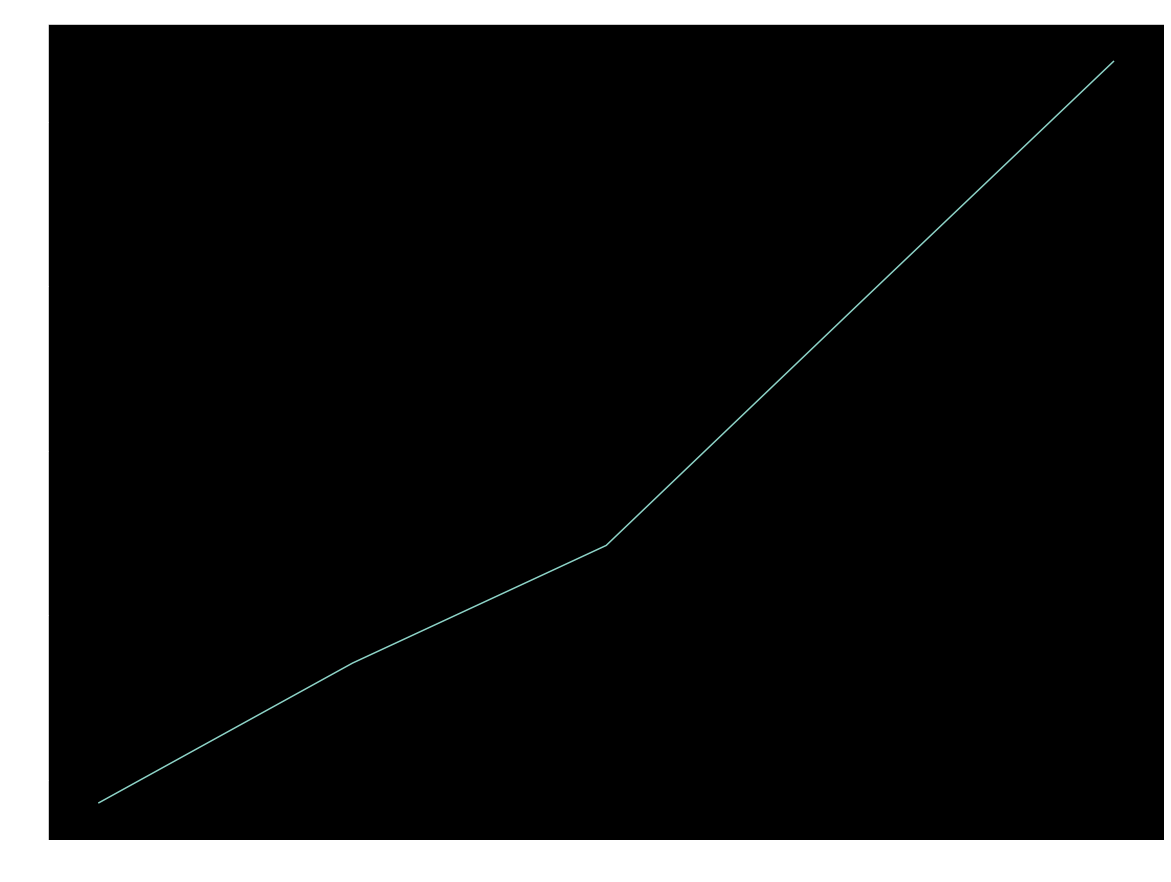

In [33]:
general_df['year'] = general_df['timestamp'].dt.year

fig, ax = plt.subplots(figsize=(20, 15))

plt.plot(general_df.groupby(['year'])['price_doc'].mean())
plt.title("Change in price over the years", fontsize=16)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Price", fontsize=14)

<AxesSubplot:xlabel='year', ylabel='price_doc'>

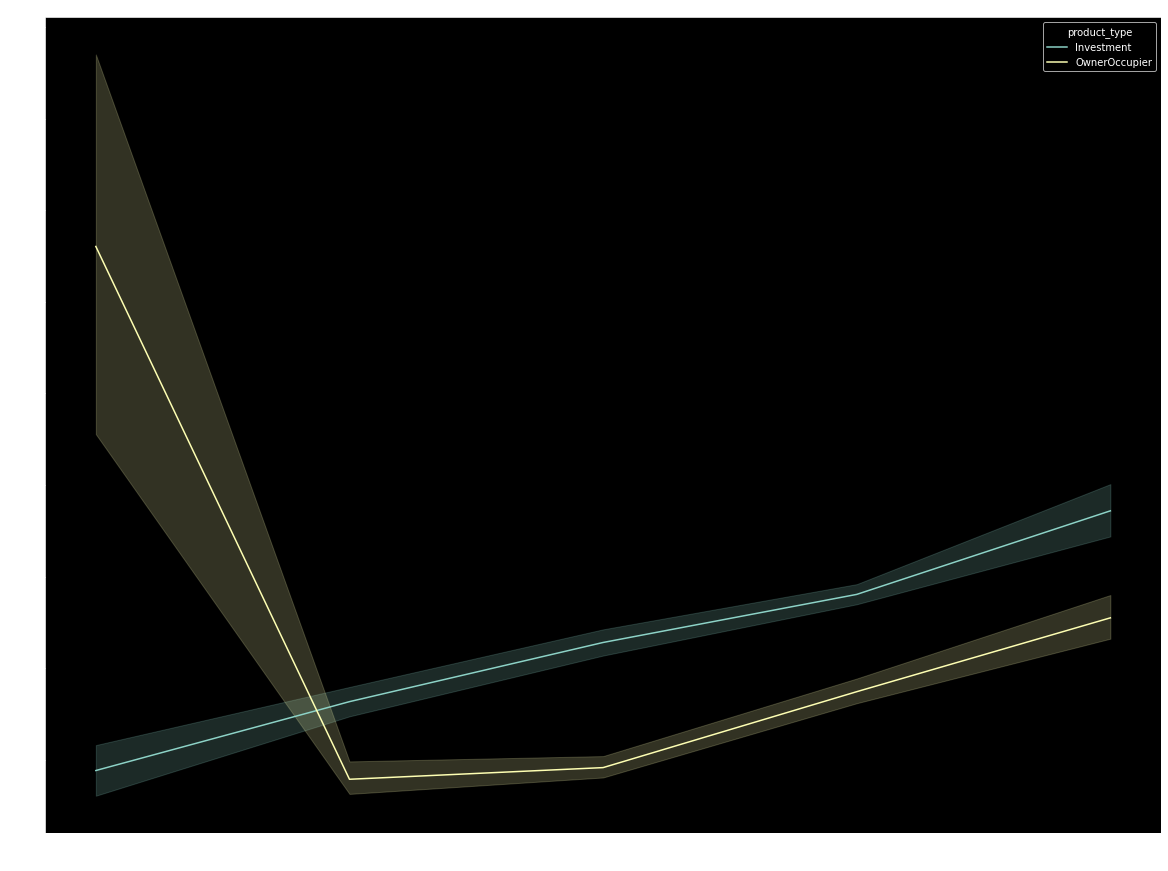

In [34]:
fig, ax = plt.subplots(figsize=(20, 15))

sns.lineplot(
    x="year",
    y='price_doc',
    data=general_df,
    hue='product_type'
)


In [35]:
sub_area = general_df.groupby(
    ['sub_area', 'product_type'])['price_doc'].mean().sort_values(ascending=False).reset_index()


In [36]:
sub_area

,sub_area,product_type,price_doc
0,Ajeroport,OwnerOccupier,7.124962e+07
1,Donskoe,OwnerOccupier,3.625691e+07
2,Zamoskvorech'e,OwnerOccupier,3.333046e+07
3,Hamovniki,OwnerOccupier,3.105268e+07
4,Presnenskoe,OwnerOccupier,2.686593e+07
...,...,...,...
238,Poselenie Shhapovskoe,Investment,2.925500e+06
239,Molzhaninovskoe,Investment,2.766667e+06
240,Poselenie Novofedorovskoe,OwnerOccupier,2.740497e+06
241,Poselenie Filimonkovskoe,Investment,2.685000e+06


<AxesSubplot:xlabel='price_doc', ylabel='sub_area'>

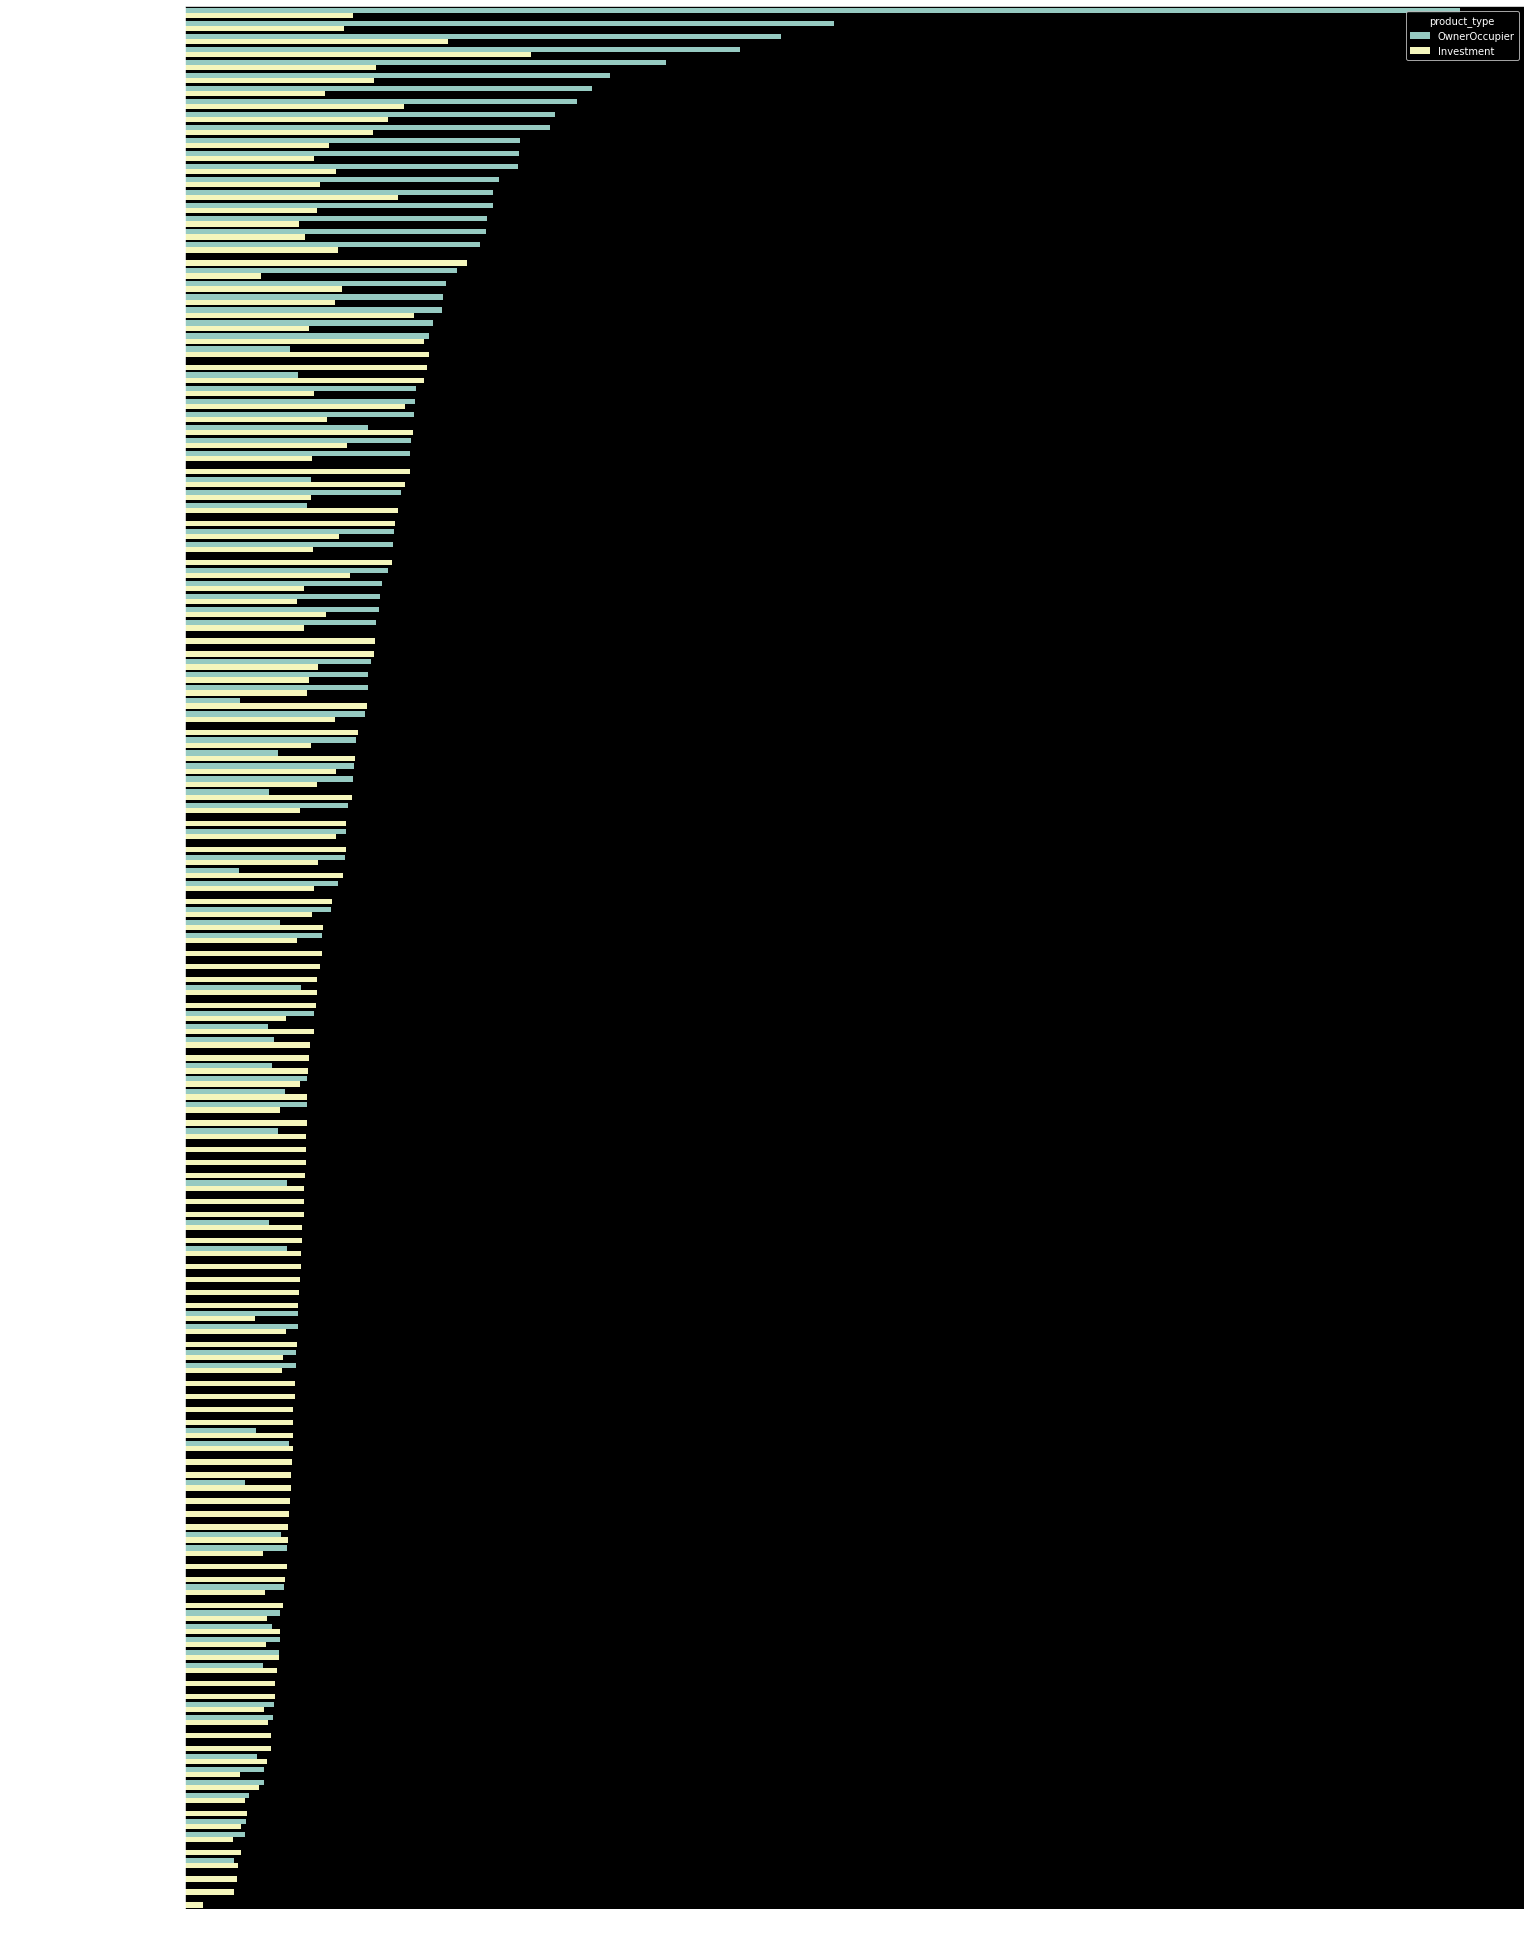

In [37]:
fig, ax = plt.subplots(figsize=(24, 35))

sns.barplot(
    x = 'price_doc',
    y = 'sub_area',
    hue="product_type",
    data = sub_area
)

In [38]:
# list for all buildings in area by construction type or year
build_count = []
for i in train.columns:
    if 'build_count_' in i:
        build_count.append(i)

build_count.append('price_doc')

build_info_df = train[build_count]
build_info_df.head()

,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,price_doc
0,211.0,25.0,0.0,0.0,0.0,2.0,184.0,0.0,0.0,0.0,211.0,0.0,0.0,0.0,206.0,5.0,5850000
1,245.0,83.0,1.0,0.0,67.0,4.0,90.0,0.0,0.0,0.0,244.0,1.0,1.0,143.0,84.0,15.0,6000000
2,330.0,59.0,0.0,0.0,206.0,4.0,60.0,0.0,1.0,0.0,330.0,1.0,0.0,246.0,63.0,20.0,5700000
3,458.0,9.0,51.0,12.0,124.0,50.0,201.0,0.0,9.0,2.0,459.0,13.0,24.0,40.0,130.0,252.0,13100000
4,746.0,48.0,0.0,0.0,643.0,16.0,35.0,0.0,3.0,1.0,746.0,371.0,114.0,146.0,62.0,53.0,16331452


In [39]:
build_info_df.isnull().sum()


raion_build_count_with_material_info     4991
build_count_block                        4991
build_count_wood                         4991
build_count_frame                        4991
build_count_brick                        4991
build_count_monolith                     4991
build_count_panel                        4991
build_count_foam                         4991
build_count_slag                         4991
build_count_mix                          4991
raion_build_count_with_builddate_info    4991
build_count_before_1920                  4991
build_count_1921-1945                    4991
build_count_1946-1970                    4991
build_count_1971-1995                    4991
build_count_after_1995                   4991
price_doc                                   0
dtype: int64

In [40]:
build_info_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   raion_build_count_with_material_info   25480 non-null  float64
 1   build_count_block                      25480 non-null  float64
 2   build_count_wood                       25480 non-null  float64
 3   build_count_frame                      25480 non-null  float64
 4   build_count_brick                      25480 non-null  float64
 5   build_count_monolith                   25480 non-null  float64
 6   build_count_panel                      25480 non-null  float64
 7   build_count_foam                       25480 non-null  float64
 8   build_count_slag                       25480 non-null  float64
 9   build_count_mix                        25480 non-null  float64
 10  raion_build_count_with_builddate_info  25480 non-null  float64
 11  bu

<AxesSubplot:>

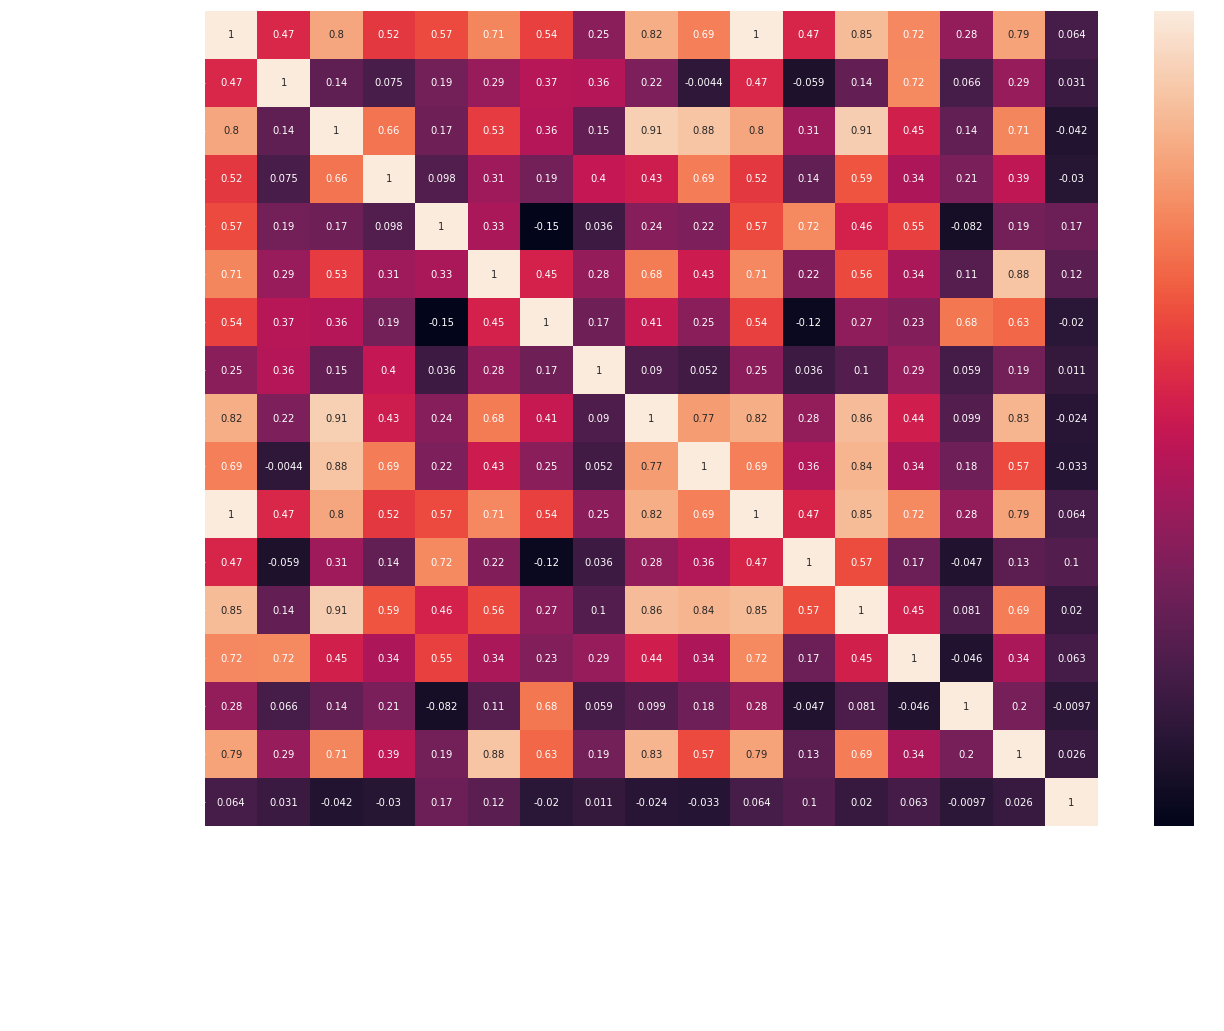

In [41]:
build_corr = build_info_df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(build_corr, annot=True)


In [5]:
corr = train.corr()
corr = corr['price_doc'].sort_values(ascending=False).reset_index()


In [6]:
zero_corr = corr[(corr['price_doc'] < 0.1) & (corr['price_doc'] > -0.1)]

zero_corr = zero_corr.set_index('index')

zero_corr = list(zero_corr.index)

**missing Values**

In [44]:
# impute_missing(train)
train.isnull().sum().sort_values(ascending=False)

general_df.isnull().sum().sort_values(ascending=False)

build_year      13605
state           13559
max_floor        9572
material         9572
num_room         9572
kitch_sq         9572
life_sq          6383
floor             167
timestamp           0
full_sq             0
product_type        0
sub_area            0
price_doc           0
month               0
year                0
dtype: int64

<AxesSubplot:>

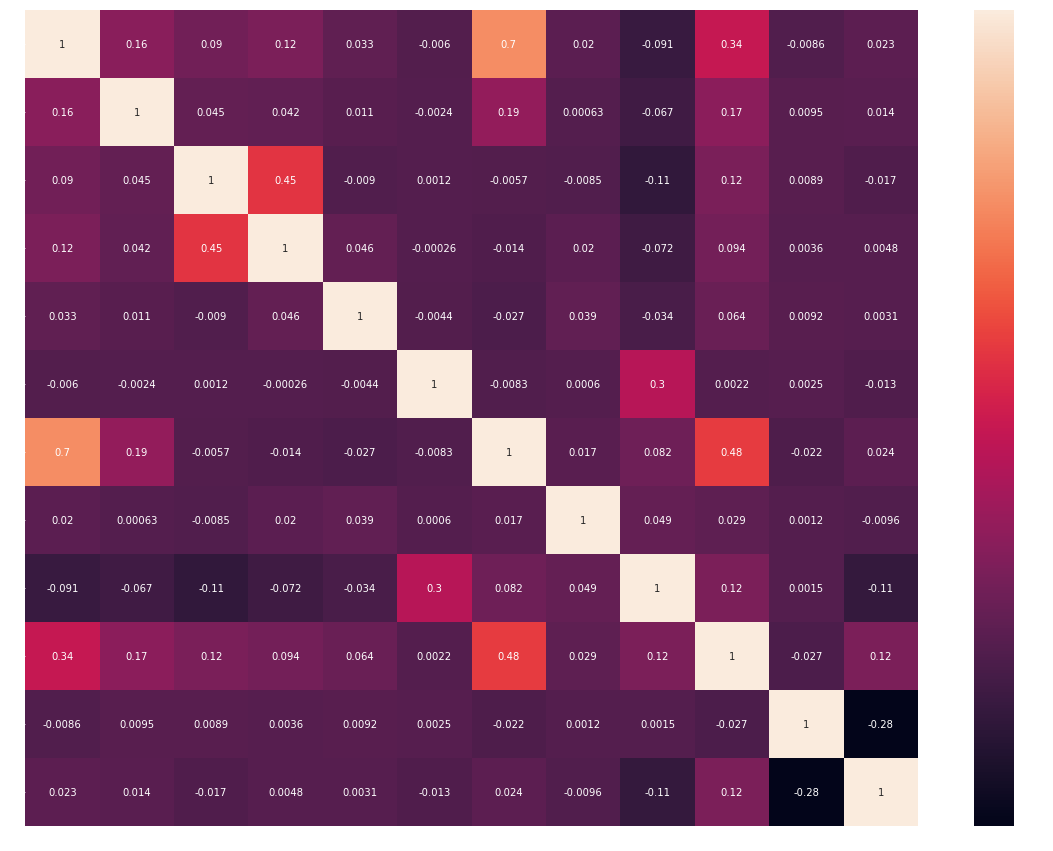

In [45]:
plt.figure(figsize=(20, 15))

sns.heatmap(
    general_df.corr(), annot=True
)

In [46]:
train['state'].value_counts()
test['state'].value_counts()

train['state'].replace(to_replace=33, value=4, inplace=True)

In [9]:
train['build_year'].value_counts()

build_yr = {
    0: np.nan,
    1: np.nan,
    3: np.nan,
    20: np.nan,
    215: np.nan,
    20052009: 2005,
    4965: 1965,
    71: 1971
}
train['build_year'].replace(to_replace=build_yr, inplace=True)

test['build_year'].value_counts()
build_yr = {
    0: np.NaN,
    1: np.NaN,
    2: np.NaN,
    215: np.NaN,
}
test['build_year'].replace(to_replace=build_yr, inplace=True)


In [10]:
train['material'].value_counts()

train['material'].replace(to_replace=3, value=6, inplace=True)


In [11]:
train['material'].replace(to_replace=3, value=6, inplace=True)

test['material'].value_counts()
test['material'].replace(to_replace=3, value=6, inplace=True)


In [12]:
train['full_sq'].replace(to_replace=0, value=np.nan, inplace=True)
test['full_sq'].replace(to_replace=0, value=np.nan, inplace=True)

In [13]:
train['max_floor'].value_counts().sort_values(ascending=True)

max_floor_dict = {
    117: 17,
    0: np.NaN
}
train['max_floor'].replace(to_replace=max_floor_dict, inplace=True)


test['max_floor'].value_counts()
train['max_floor'].replace(to_replace=0, value=np.nan, inplace=True)


**missing values**

In [14]:
# num_columns = [x for x in train if train[x].dtype != "object" or if train[x]. ]
num_cols = []

for i in train:
    if ((train[i].dtype != "object") & (train[i].dtype != 'datetime64')):
        num_cols.append(i)

obj_cols = []
for i in train:
    if ((train[i].dtype == "object")):
        obj_cols.append(i)

obj_cols

date_cols = []

for i in train:
    if ((train[i].dtype == 'datetime64')):
        date_cols.append(i)

date_cols

[]

In [15]:
'timestamp' in train[num_cols]

num_cols.remove('timestamp')

ValueError: list.remove(x): x not in list

In [54]:
knnimpute = KNNImputer()

knnimpute.fit(train[num_cols])

KNNImputer()

In [55]:

pred = knnimpute.transform(train[num_cols])

In [ ]:
pred_df = pd.DataFrame(pred, columns=num_cols)
pred_df.head()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,yearmonth
0,1.0,43.0,27.0,4.0,13.0,2.6,1975.6,1.0,7.2,2.2,...,4.0,0.0,13.0,22.0,1.0,0.0,52.0,4.0,5850000.0,201108.0
1,2.0,34.0,19.0,3.0,17.0,4.8,2007.0,1.0,6.8,1.4,...,3.0,0.0,15.0,29.0,1.0,10.0,66.0,14.0,6000000.0,201108.0
2,3.0,43.0,29.0,2.0,7.6,2.6,1963.2,1.4,6.2,2.4,...,3.0,0.0,11.0,27.0,0.0,4.0,67.0,10.0,5700000.0,201108.0
3,4.0,89.0,50.0,9.0,18.0,2.6,2003.0,3.4,8.2,2.8,...,2.0,1.0,4.0,4.0,0.0,0.0,26.0,3.0,13100000.0,201109.0
4,5.0,77.0,77.0,4.0,6.2,2.0,1949.8,3.4,7.4,2.6,...,108.0,17.0,135.0,236.0,2.0,91.0,195.0,14.0,16331452.0,201109.0


In [ ]:
train[num_cols] = pred_df

In [ ]:
train.to_csv("clean_train.csv")

### Feature Engineering

**state**

In [ ]:
train['full_sq'].replace(to_replace=0, value=np.nan, inplace=True)
test['full_sq'].replace(to_replace=0, value=np.nan, inplace=True)

**num_room**

In [ ]:
train['num_room'].value_counts()

1.0     9803
2.0     9319
3.0     4950
1.4     1045
1.2     1017
        ... 
5.6        1
19.0       1
7.0        1
17.0       1
9.0        1
Name: num_room, Length: 31, dtype: int64

**max_floor**

In [ ]:
train['max_floor'].value_counts().sort_values(ascending=True)

max_floor_dict = {
    117: 17,
    0: np.NaN
}
train['max_floor'].replace(to_replace=max_floor_dict, inplace=True)

In [ ]:
test['max_floor'].value_counts()
# train['max_floor'].replace(to_replace=0, value=np.nan, inplace=True)

17    1827
9     1004
5      766
12     737
14     439
      ... 
32       1
37       1
38       1
39       1
28       1
Name: max_floor, Length: 41, dtype: int64

**Residential and Kitchen Ratio**

In [7]:
train = pd.read_csv('clean_train.csv', sep=",")

train = train.drop('Unnamed: 0', axis=1)

train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,yearmonth
0,1.0,2011-08-20,43.0,27.0,4.0,13.0,2.6,1975.6,1.0,7.2,...,4.0,0.0,13.0,22.0,1.0,0.0,52.0,4.0,5850000.0,201108.0
1,2.0,2011-08-23,34.0,19.0,3.0,17.0,4.8,2007.0,1.0,6.8,...,3.0,0.0,15.0,29.0,1.0,10.0,66.0,14.0,6000000.0,201108.0
2,3.0,2011-08-27,43.0,29.0,2.0,7.6,2.6,1963.2,1.4,6.2,...,3.0,0.0,11.0,27.0,0.0,4.0,67.0,10.0,5700000.0,201108.0
3,4.0,2011-09-01,89.0,50.0,9.0,18.0,2.6,2003.0,3.4,8.2,...,2.0,1.0,4.0,4.0,0.0,0.0,26.0,3.0,13100000.0,201109.0
4,5.0,2011-09-05,77.0,77.0,4.0,6.2,2.0,1949.8,3.4,7.4,...,108.0,17.0,135.0,236.0,2.0,91.0,195.0,14.0,16331452.0,201109.0


In [8]:
for col in train.columns:
    if ('id' in col or "ID" in col):
        zero_corr.append(col)

zero_corr.append('timestamp')

In [9]:
for set_ in (train, test):
    set_.drop(zero_corr, axis=1, inplace=True)

In [8]:
# zero_corr

In [10]:
num_cols = []
obj_cols = []

for col in train.columns:
    if (train[col].dtype != "object"):
        num_cols.append(col)
    else:
        obj_cols.append(col)

In [11]:
dummies = pd.get_dummies(train[obj_cols])
train = pd.concat([train, dummies], axis=1)

train = train.drop(train[obj_cols], axis=1)
train.head()


,full_sq,life_sq,floor,num_room,state,area_m,raion_popul,children_preschool,preschool_education_centers_raion,children_school,...,water_1line_yes,big_road1_1line_no,big_road1_1line_yes,railroad_1line_no,railroad_1line_yes,ecology_excellent,ecology_good,ecology_no data,ecology_poor,ecology_satisfactory
0,43.0,27.0,4.0,1.0,2.2,6.407578e+06,155572.0,9576.0,5.0,10309.0,...,0,1,0,1,0,0,1,0,0,0
1,34.0,19.0,3.0,1.0,1.4,9.589337e+06,115352.0,6880.0,5.0,7759.0,...,0,1,0,1,0,1,0,0,0,0
2,43.0,29.0,2.0,1.4,2.4,4.808270e+06,101708.0,5879.0,4.0,6207.0,...,0,1,0,1,0,0,0,0,1,0
3,89.0,50.0,9.0,3.4,2.8,1.258354e+07,178473.0,13087.0,9.0,13670.0,...,0,1,0,1,0,0,1,0,0,0
4,77.0,77.0,4.0,3.4,2.6,8.398461e+06,108171.0,5706.0,7.0,6748.0,...,0,1,0,0,1,1,0,0,0,0


In [12]:
test_dummies = pd.get_dummies(test[obj_cols])

test = pd.concat([test, test_dummies], axis=1)
test = test.drop(test[obj_cols], axis=1)

In [13]:
train

,full_sq,life_sq,floor,num_room,state,area_m,raion_popul,children_preschool,preschool_education_centers_raion,children_school,...,water_1line_yes,big_road1_1line_no,big_road1_1line_yes,railroad_1line_no,railroad_1line_yes,ecology_excellent,ecology_good,ecology_no data,ecology_poor,ecology_satisfactory
0,43.0,27.0,4.0,1.0,2.2,6.407578e+06,155572.0,9576.0,5.0,10309.0,...,0,1,0,1,0,0,1,0,0,0
1,34.0,19.0,3.0,1.0,1.4,9.589337e+06,115352.0,6880.0,5.0,7759.0,...,0,1,0,1,0,1,0,0,0,0
2,43.0,29.0,2.0,1.4,2.4,4.808270e+06,101708.0,5879.0,4.0,6207.0,...,0,1,0,1,0,0,0,0,1,0
3,89.0,50.0,9.0,3.4,2.8,1.258354e+07,178473.0,13087.0,9.0,13670.0,...,0,1,0,1,0,0,1,0,0,0
4,77.0,77.0,4.0,3.4,2.6,8.398461e+06,108171.0,5706.0,7.0,6748.0,...,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44.0,27.0,7.0,2.0,3.0,1.005305e+07,175518.0,9753.0,4.0,10311.0,...,0,1,0,1,0,0,1,0,0,0
30467,86.0,59.0,3.0,4.0,3.0,7.307411e+06,75377.0,4237.0,4.0,6398.0,...,0,1,0,1,0,0,0,0,1,0
30468,45.0,53.8,10.0,1.0,1.0,2.553630e+07,4001.0,275.0,0.0,264.0,...,0,1,0,1,0,0,0,1,0,0
30469,64.0,32.0,5.0,2.0,2.0,6.050065e+06,78616.0,4215.0,6.0,4635.0,...,0,1,0,1,0,0,0,0,0,1


In [14]:
test

,full_sq,life_sq,floor,num_room,state,area_m,raion_popul,children_preschool,preschool_education_centers_raion,children_school,...,water_1line_yes,big_road1_1line_no,big_road1_1line_yes,railroad_1line_no,railroad_1line_yes,ecology_excellent,ecology_good,ecology_no data,ecology_poor,ecology_satisfactory
0,39.00,20.7,2,1,3.0,2.615514e+07,178264,14080,11,14892,...,0,1,0,1,0,0,0,0,0,1
1,79.20,NaN,8,3,1.0,2.553630e+07,4001,275,0,264,...,0,1,0,1,0,0,0,1,0,0
2,40.50,25.1,3,2,2.0,9.946335e+06,139322,6400,7,6558,...,0,1,0,1,0,0,0,0,1,0
3,62.80,36.0,17,2,3.0,2.149409e+07,7122,489,0,469,...,0,1,0,1,0,0,0,1,0,0
4,40.00,40.0,17,1,1.0,2.553630e+07,4001,275,0,264,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,52.20,31.8,10,2,2.0,7.811375e+06,153248,7517,5,7960,...,0,1,0,1,0,0,0,0,0,1
7658,54.09,NaN,14,2,NaN,5.299528e+07,13890,953,0,915,...,0,1,0,1,0,0,0,1,0,0
7659,41.08,1.0,12,1,1.0,7.307411e+06,75377,4237,4,6398,...,0,1,0,1,0,1,0,0,0,0
7660,34.80,19.8,8,1,2.0,7.128794e+06,145576,5594,7,7227,...,0,1,0,1,0,0,0,0,1,0


**Model Selection**

In [ ]:
train.dtypes

full_sq                 float64
life_sq                 float64
floor                   float64
num_room                float64
state                   float64
                         ...   
ecology_excellent         uint8
ecology_good              uint8
ecology_no data           uint8
ecology_poor              uint8
ecology_satisfactory      uint8
Length: 358, dtype: object

In [15]:
X = train.drop("price_doc", axis=1)
y = train['price_doc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()

scaler.fit_transform(X_train)

array([[-0.20486839, -0.19521239, -0.69364946, ..., -0.57975038,
        -0.59680914, -0.371343  ],
       [ 1.94178706,  1.06469739, -1.06968246, ...,  1.72488029,
        -0.59680914, -0.371343  ],
       [-0.25365602, -0.1729131 , -0.31761646, ..., -0.57975038,
        -0.59680914,  2.69292812],
       ...,
       [ 0.11225116,  0.06866252, -0.69364946, ..., -0.57975038,
         1.67557755, -0.371343  ],
       [ 0.23422022, -0.0799994 , -1.06968246, ..., -0.57975038,
        -0.59680914, -0.371343  ],
       [-0.52198795, -0.4516542 ,  1.37453206, ...,  1.72488029,
        -0.59680914, -0.371343  ]])

In [17]:
linReg = LinearRegression()

linReg.fit(X_train, y_train)

LinearRegression()

In [16]:
scaler.transform(X_test)
pred = linReg.predict(X_test)

In [ ]:
def normalize(df):
    """
        A function to normalize a dataset
    """
    result = df.copy()
    
    for feature_name in len(range(df)):
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()

        result[feature_name] = (result[feature_name] - min_value) / (max_value - min_value)

        return result

In [18]:
# def RMSLE(y_true, y_pred):
#     """A Function to calculate the root mean square error
#      of the predictions made by the regressor"""

#     msle = mean_squared_log_error(y_true, normalize(y_pred))

#     rmsle = np.sqrt(msle)

#     print(rmsle)




def RMSLE(y_true, y_pred):
    """A Function to calculate the root mean square error
     of the predictions made by the regressor"""

    msle = mean_squared_log_error(y_true, y_pred)

    rmsle = np.sqrt(msle)

    print(rmsle)

In [18]:
neg_vals = []

for i in range(len(pred)):
    if pred[i] < 0:
       pred[i]  = np.median(pred)


In [19]:
RMSLE(y_test, pred)

0.533712924255648


In [32]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [27]:
LogReg = LogisticRegression()

# params = {
#     'max_iter': [x for x in range(99, 1001) if x % 10 == 0],
#     'solver': ['liblinear', 'saga'],
#     'penalty': ['l2'],
#     'dual': [True, False],
#     'max_iter': [100, 500, 1000],
#     "C": [0.1, 0.5, 1]
# }

params = {
    'max_iter': [x for x in range(99, 1001) if x % 10 == 0],
    'penalty': ['l2'],
    'max_iter': [100, 500, 1000],
    "C": [0.1, 0.5, 1, 10, 50, 100]
}


logReg_cv = HalvingGridSearchCV(LogReg, param_grid=params, scoring="accuracy", cv=3, factor=3, min_resources=100, verbose=True)

In [33]:
logReg_cv.fit(X_train_scaled, y_train)



n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 5
min_resources_: 100
max_resources_: 24376
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 18
n_resources: 100
Fitting 3 folds for each of 18 candidates, totalling 54 fits


C:\Users\David-Daniel\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\David-Daniel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\David-Daniel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_it

----------
iter: 1
n_candidates: 6
n_resources: 300
Fitting 3 folds for each of 6 candidates, totalling 18 fits


C:\Users\David-Daniel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\David-Daniel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

----------
iter: 2
n_candidates: 2
n_resources: 900
Fitting 3 folds for each of 2 candidates, totalling 6 fits


C:\Users\David-Daniel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\David-Daniel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres